In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import train_test_split ##Datos de entrenamiento y datos de testeo


import pandas as pd
pd.set_option('display.float_format', '{:20,.2f}'.format)

In [20]:
#Explorando los datos

#dataset = pd.read_csv('/home/kincaid/Documents/ucags/data_science_master/1_sem/data_science_intro/s8_logistic_regression_data.csv')
#dataset = pd.read_csv('./s8_logistic_regression_data.csv') ## Relative to jupyter start command
dataset = pd.read_csv('s8_logistic_regression_data.csv') ## Relative to jupyter start command
#dataset = pd.read_csv('~/Documents/ucags/data_science_master/1_sem/data_science_intro/s8_logistic_regression_data.csv') ## Relative to jupyter start command



In [21]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1


In [22]:
dataset.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,...,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,0.88,0.53,16.70,0.78,0.29,0.90,2.75,2.52,1.45,2.04,...,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42,0.67
std,0.32,0.50,1.28,0.42,0.45,0.31,1.09,1.09,0.70,0.84,...,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58,0.47
min,0.00,0.00,15.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00,0.00
25%,1.00,0.00,16.00,1.00,0.00,1.00,2.00,2.00,1.00,1.00,...,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00,0.00
50%,1.00,1.00,17.00,1.00,0.00,1.00,3.00,2.00,1.00,2.00,...,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00,1.00
75%,1.00,1.00,18.00,1.00,1.00,1.00,4.00,3.00,2.00,2.00,...,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00,1.00
max,1.00,1.00,22.00,1.00,1.00,1.00,4.00,4.00,4.00,4.00,...,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00,1.00


In [33]:
dataset.shape

(395, 30)

In [27]:
dataset.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
pass          int64
dtype: object

In [31]:
dataset.corr()['pass']

school                       0.03
sex                         -0.07
age                         -0.18
address                      0.05
famsize                      0.04
Pstatus                     -0.04
Medu                         0.12
Fedu                         0.11
traveltime                  -0.04
studytime                    0.07
failures                    -0.34
schoolsup                   -0.10
famsup                      -0.06
paid                         0.09
activities                   0.01
nursery                     -0.01
higher                       0.16
internet                     0.06
romantic                    -0.10
famrel                       0.05
freetime                    -0.02
goout                       -0.18
Dalc                        -0.06
Walc                        -0.03
health                      -0.07
absences                    -0.09
G1                           0.66
G2                           0.73
G3                           0.77
pass          

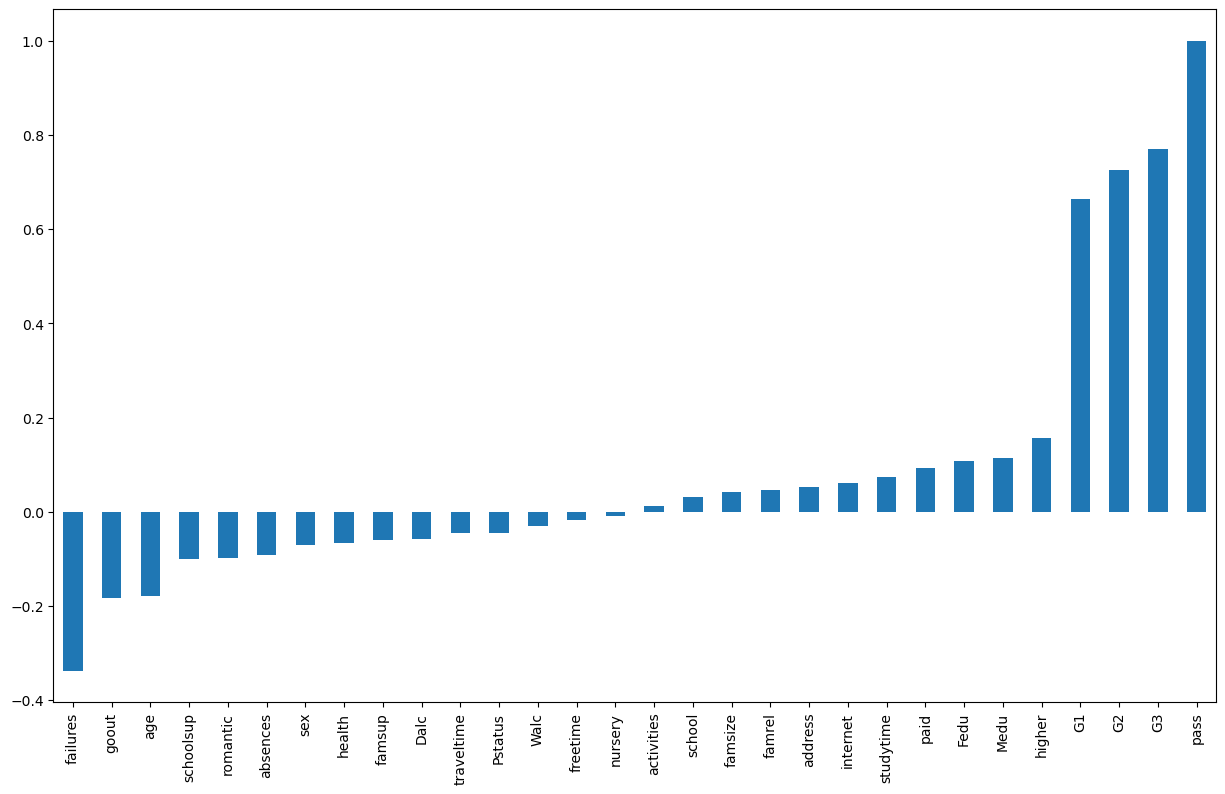

In [30]:
#Correlaciones


fig = plt.figure(figsize=(15,9))
## La relación entre el valor de pass y el resto de las columnas
dataset.corr()['pass'].sort_values(ascending=True).plot(kind="bar")
plt.show()

In [34]:
# Seleccionando solo Absences G1-G3
# 
X = dataset['absences G1 G2 G3'.split()].copy()

In [35]:
#Seleccionando y
y = dataset['pass'].copy()

In [36]:
#Instanciando el modelo
## Random state (scikitlearn) semilla para generar un random como igual a cero voy a obtener el mismo resultado del profe
# el gradiente ascendente es una optimizacion numerica, la semilla indica donde empiezas a buscar
LogisticR = LogisticRegression(random_state=0)

In [43]:
#30% para test y 70% para train

#Entrenando el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, )
LogisticR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
#Calculo de las predicciones en Train y Test
y_train_pred = LogisticR.predict(X_train)
y_test_pred = LogisticR.predict(X_test)

In [46]:
y_test_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [48]:
#los thetas
LogisticR.coef_

array([[-0.03905134,  0.01829067,  0.44886752,  3.70897216]])

In [52]:
print("El accuracy score tr:")
print(metrics.accuracy_score(y_train, y_train_pred))

print("El accuracy score ts:")
print(metrics.accuracy_score(y_test, y_test_pred))

El accuracy score tr:
1.0
El accuracy score ts:
1.0


In [ ]:
#los nombres de las variables (features)


In [ ]:
#Plotting the weights

# las predicciones

In [ ]:
# Con qué probabilidad de dice que es cero o uno, pasó o no el examen


# Cómo testeamos nuestro modelo?

<Figure size 1100x1100 with 0 Axes>

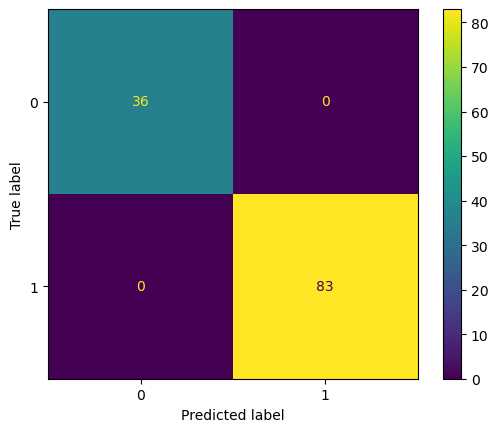

In [54]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, y_test_pred, labels=LogisticR.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LogisticR.classes_)
disp.plot()
plt.show()